<a href="https://colab.research.google.com/github/ucfilho/Fer_Calsoni/blob/master/Boiler_Part_09_open_Fer_June_03_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# carrega as bibliotecas do python

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import os
from pandas import read_excel
import numpy as np
from sklearn.decomposition import PCA
import statistics as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 

In [0]:
# carrega o arquivo de nome Fernando_Caldeira_1_maio_10_2019.xlsx (tem q usar este nome)

In [4]:
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Fernando_Caldeira_1_maio_10_2019.xlsx to Fernando_Caldeira_1_maio_10_2019 (7).xlsx


In [0]:
# leitura dos dados 

In [6]:
# find your sheet name at the bottom left of your excel file and assign 
# it to sheet_name
my_sheet = 'Planilha1'
file_name = 'Fernando_Caldeira_1_maio_10_2019.xlsx' # name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head(3)) # shows headers with top 5 rows

        Data      TC  Patm\n  Vaz_Vap  ...  Cinzas  PCI_Cinzas  Temp_Desc  TC_Gases
0 2017-12-01  505.19   67.88    71.66  ...   94.04       791.0      110.0    194.97
1 2017-12-02  503.29   68.03    66.34  ...   92.92       747.0      110.0    194.00
2 2017-12-03  512.39   68.00    79.83  ...   92.26       793.0      110.0    194.00

[3 rows x 19 columns]


In [0]:
# Une as colunas que fara um estudo

In [8]:
X=df.drop(['Data'], axis=1)
print(X.head(3)) # shows headers with top 5 rows

       TC  Patm\n  Vaz_Vap  Vaz_agua  ...  Cinzas  PCI_Cinzas  Temp_Desc  TC_Gases
0  505.19   67.88    71.66     75.45  ...   94.04       791.0      110.0    194.97
1  503.29   68.03    66.34     69.80  ...   92.92       747.0      110.0    194.00
2  512.39   68.00    79.83     83.14  ...   92.26       793.0      110.0    194.00

[3 rows x 18 columns]


In [0]:
# Busca de dados sujos

In [10]:
print(X.isnull().any())

TC               True
Patm\n           True
Vaz_Vap          True
Vaz_agua         True
Agua_Vapor       True
Perc_Descarga    True
Pressao_01\n     True
Pressao_02\n     True
Perc_Abertura    True
TC_Fornalha      True
Oxigenio         True
H20_Biom         True
PCI_Biomas       True
Escesso_Ar       True
Cinzas           True
PCI_Cinzas       True
Temp_Desc        True
TC_Gases         True
dtype: bool


In [0]:
# Limpeza dos dados

In [0]:
X=X.dropna()
#print(X.isnull().any())

In [13]:

'''
ENTRADA
H20_Biom         True
PCI_Biomas       True
Escesso_Ar       True
Vaz_agua         True
Temp_Desc        True
BIOMASSA_M3_DIA

SAIDA:
TC               True
Patm\n           True
Vaz_Vap          True
Agua_Vapor       True
Perc_Descarga    True
Pressao_01\n     True
Pressao_02\n     True
Perc_Abertura    True
TC_Fornalha      True
PCI_Cinzas       True
TC_Gases         True
Cinzas           True
Oxigenio         True
'''



'\nENTRADA\nH20_Biom         True\nPCI_Biomas       True\nEscesso_Ar       True\nVaz_agua         True\nTemp_Desc        True\nBIOMASSA_M3_DIA\n\nSAIDA:\nTC               True\nPatm\n           True\nVaz_Vap          True\nAgua_Vapor       True\nPerc_Descarga    True\nPressao_01\n     True\nPressao_02\n     True\nPerc_Abertura    True\nTC_Fornalha      True\nPCI_Cinzas       True\nTC_Gases         True\nCinzas           True\nOxigenio         True\n'

In [0]:
Vapor=[]
Vapor=np.copy(X['Vaz_Vap'])
Vapor=pd.DataFrame({'Vaz_Vap':Vapor})
#print(Vapor)

In [0]:
#print(X.head())

In [0]:
#sortedPoints = sorted(Vapor)
#mid = len(sortedPoints)
#print(mid)


In [17]:
print(Vapor.describe())

         Vaz_Vap
count  31.000000
mean   70.799032
std     5.839929
min    60.830000
25%    67.745000
50%    71.160000
75%    73.035000
max    86.330000


In [0]:
Num=len(Vapor)
Vapor_x=np.copy(Vapor)
for i in range(Num):
  if(Vapor_x[i]<67.75):
    Vapor_x[i]=1 # Vapor=1 é baixo
  else:
    if(Vapor_x[i]>73.03):
      Vapor_x[i]=3 # Vapor=3 é alto
    else:
      Vapor_x[i]=2 # Vapor=1 é médio
#Vapor_x=np.array(Vapor_x)
#print(Vapor_x)
#print(X['Vaz_Vap'])

In [19]:
#Nomes=['H20_Biom','PCI_Biomas','Escesso_Ar','Vaz_agua','BIOMASSA_M3_DIA']
Nomes=['H20_Biom','PCI_Biomas','Escesso_Ar','Vaz_agua'] # ???'BIOMASSA_M3_DIA'
# 'Temp_Desc' NAO ESTA VARIANDO
x=X[Nomes]
print(x)

y = Vapor_x

    H20_Biom  PCI_Biomas  Escesso_Ar  Vaz_agua
0     30.350      3060.0       24.63     75.45
1     35.320      2905.0       30.03     69.80
2     34.460      2932.0       27.04     83.14
3     35.260      2907.0       28.76     89.18
4     43.200      2658.0       31.25     87.13
5     42.945      3192.0       30.19     71.57
6     35.400      2902.0       25.90     68.98
7     33.270      2970.0       26.74     63.12
8     29.880      3075.0       31.25     71.09
9     33.660      2957.0       32.08     71.08
10    35.740      2892.0       29.63     71.36
11    37.420      2667.0       31.25     77.83
12    39.380      2800.0       32.92     74.96
13    36.620      2864.0       30.03     63.08
14    38.800      2777.0       33.16     68.52
15    37.140      2848.0       29.39     76.33
16    38.460      3022.0       32.58     77.10
17    43.960      2484.0       32.91     73.43
18    37.560      3129.0       32.80     75.38
19    37.200      3040.0       32.33     63.11
20    35.020 

In [20]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot


# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# fit model no training data
model = XGBClassifier()
model.fit(x, y)


kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy cross: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 100.00%
Accuracy cross: 87.50% (15.48%)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


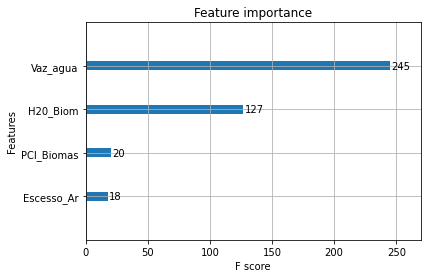

In [21]:
# plot feature importance
plot_importance(model)
pyplot.show()

In [22]:

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# fit model no training data

Accuracy: 100.00%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


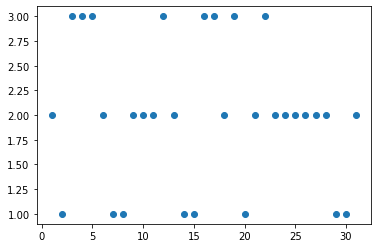

In [23]:
xw=range(1,(len(y)+1))
plt.scatter(xw,y)

In [0]:
TC_Fornalha=[]
TC_Fornalha=np.copy(X['TC_Fornalha'])
TC_Fornalha=pd.DataFrame({'TC_Fornalha':TC_Fornalha})
#print(TC_Fornalha)

In [25]:
print(TC_Fornalha.describe())

       TC_Fornalha
count    31.000000
mean    738.951935
std      37.789074
min     670.120000
25%     720.185000
50%     741.290000
75%     768.625000
max     812.730000


In [0]:
Num=len(TC_Fornalha)
TC_Fornalha_x=np.copy(TC_Fornalha)
for i in range(Num):
  if(TC_Fornalha_x[i]<720.18):
    TC_Fornalha_x[i]=1 # TC_Fornalha=1 é baixo
  else:
    if(TC_Fornalha_x[i]>768.62):
      TC_Fornalha_x[i]=3 # TC_Fornalha=3 é alto
    else:
      TC_Fornalha_x[i]=2 # TC_Fornalha=1 é médio

In [27]:
print(TC_Fornalha)
print(TC_Fornalha_x)

    TC_Fornalha
0        730.92
1        730.86
2        730.99
3        783.20
4        730.74
5        741.29
6        696.92
7        670.12
8        694.93
9        686.89
10       694.24
11       771.72
12       812.73
13       670.12
14       756.73
15       791.56
16       765.53
17       779.48
18       777.62
19       670.12
20       736.68
21       739.04
22       741.91
23       779.80
24       761.22
25       746.79
26       755.39
27       745.96
28       713.98
29       726.39
30       773.64
[[2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [1.]
 [2.]
 [3.]
 [2.]
 [3.]
 [3.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [3.]]


In [0]:
y = TC_Fornalha_x

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy cross: 35.83% (10.57%)


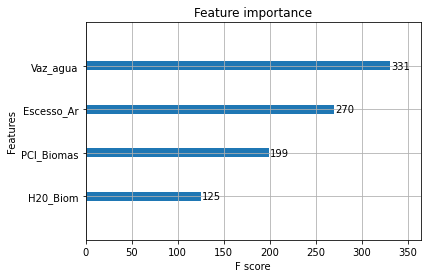

In [29]:
# fit model no training data
model = XGBClassifier()
model.fit(x, y)

kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy cross: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
# plot feature importance
plot_importance(model)
pyplot.show()

In [30]:

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# fit model no training data


kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy cross: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 45.45%
Accuracy cross: 35.83% (10.57%)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
# plt.scatter(X['Vaz_agua'],y)

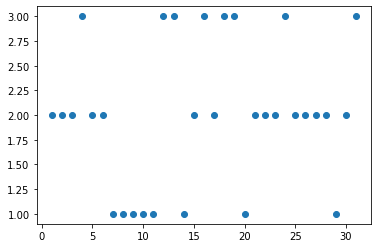

In [32]:
xw=range(1,(len(y)+1))
plt.scatter(xw,y)

In [0]:
#TC_Gases=[]
#TC_Gases=np.copy(X['TC_Gases'])
#TC_Gases=pd.DataFrame({'TC_Gases':TC_Gases}) 
TC_Gases=pd.DataFrame({'TC_Gases':X['TC_Gases']})
#print(TC_Gases)

In [34]:
print(TC_Gases.describe())

         TC_Gases
count   31.000000
mean   194.298387
std      4.712509
min    185.410000
25%    192.200000
50%    194.630000
75%    196.750000
max    211.240000


In [0]:
Num=len(TC_Gases)
TC_Gases_x=np.copy(TC_Gases)
for i in range(Num):
  if(TC_Gases_x[i]<192.2):
    TC_Gases_x[i]=1 # TC_Gases=1 é baixo
  else:
    if(TC_Gases_x[i]>196):
      TC_Gases_x[i]=3 # TC_Gases=3 é alto
    else:
      TC_Gases_x[i]=2 # TC_Gases=1 é médio

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


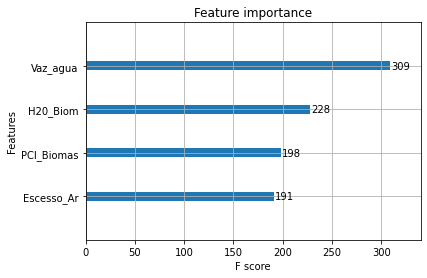

In [36]:
y = TC_Gases_x
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [37]:

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# fit model no training data



kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy cross: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 45.45%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy cross: 38.33% (23.63%)


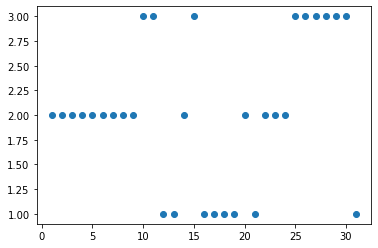

In [38]:
xw=range(1,(len(y)+1))
plt.scatter(xw,y)

In [0]:
Oxigenio=pd.DataFrame({'Oxigenio':X['Oxigenio']})
#print(Oxigenio)

In [40]:
print(Oxigenio.describe())

        Oxigenio
count  31.000000
mean    4.960968
std     0.360595
min     4.150000
25%     4.785000
50%     5.000000
75%     5.155000
max     6.000000


In [0]:
Num=len(Oxigenio)
Oxigenio_x=np.copy(Oxigenio)
for i in range(Num):
  if(Oxigenio_x[i]<4.785):
    Oxigenio_x[i]=1 # Oxigenio=1 é baixo
  else:
    if(Oxigenio_x[i]>5.155):
      Oxigenio_x[i]=3 # Oxigenio=3 é alto
    else:
      Oxigenio_x[i]=2 # Oxigenio=1 é médio

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


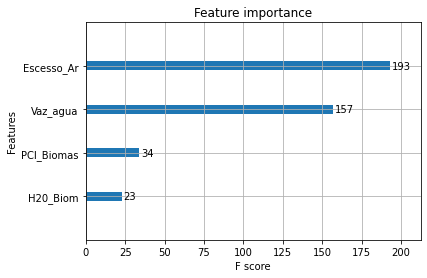

In [42]:
y = Oxigenio_x
# fit model no training data
model = XGBClassifier()
model.fit(x, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [43]:

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# fit model no training data


kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print("Accuracy cross: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 90.91%
Accuracy cross: 76.67% (26.03%)


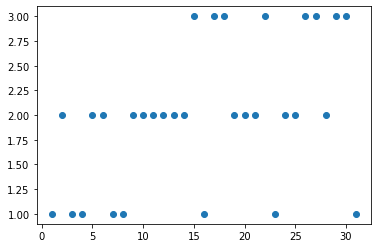

In [44]:
xw=range(1,(len(y)+1))
plt.scatter(xw,y)